In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("salader/dogs-vs-cats")

# print("Path to dataset files:", path)

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [4]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
# !pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [6]:
train_dataset=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [7]:
test_dataset=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [8]:
def process(image,label):
  image= tf.cast(image/255,tf.float32)
  return image,label

train_ds= train_dataset.map(process)
validation_ds= test_dataset.map(process)

In [9]:
model= Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 74ms/step - accuracy: 0.6248 - loss: 0.6361 - val_accuracy: 0.7604 - val_loss: 0.4971
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7669 - loss: 0.4795 - val_accuracy: 0.7976 - val_loss: 0.4582
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 91ms/step - accuracy: 0.8279 - loss: 0.3850 - val_accuracy: 0.7948 - val_loss: 0.4713
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 79ms/step - accuracy: 0.8829 - loss: 0.2712 - val_accuracy: 0.7860 - val_loss: 0.6388
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.9369 - loss: 0.1591 - val_accuracy: 0.7990 - val_loss: 0.7266
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - accuracy: 0.9612 - loss: 0.1009 - val_accuracy: 0.7870 - val_loss: 0.9669
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9758 - loss: 0.0677 - val_accuracy: 0.7794 - val_loss: 1.0437
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9829 - loss: 0.0557 - 

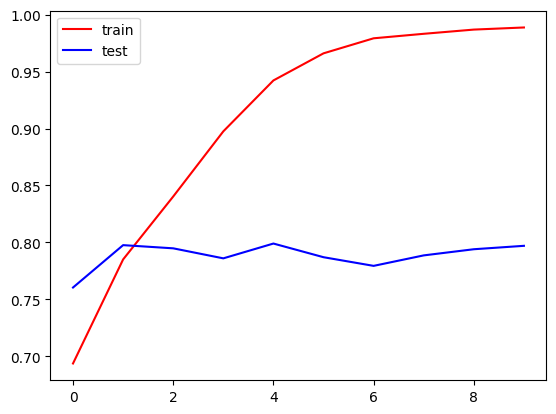

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='test')

plt.legend()
plt.show()

In [16]:
import cv2

In [23]:
test_img= cv2.imread("/content/pomeranian.jpg")

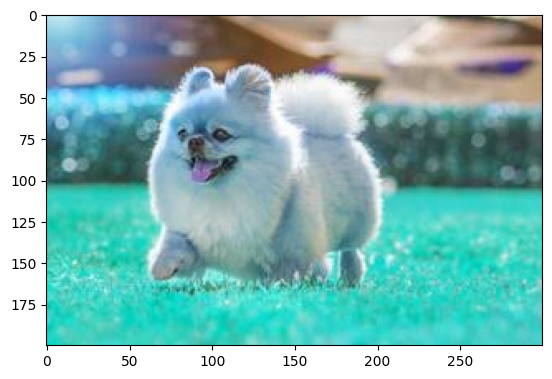

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(200, 300, 3)

In [26]:
test_img_resize= cv2.resize(test_img,(256,256))

In [27]:
test_input= test_img_resize.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.]], dtype=float32)

In [31]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
img= image.load_img("/content/pomeranian.jpg",target_size=(256,256))

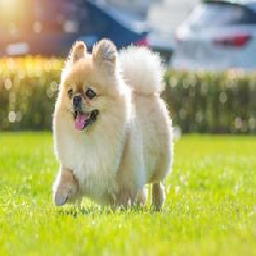

In [34]:
img

In [35]:
type(img)

PIL.Image.Image

# Data Augmentation

In [36]:
datagen= ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [37]:
img= image.img_to_array(img)

In [38]:
type(img)

numpy.ndarray

In [39]:
img

array([[[239., 227., 189.],
        [240., 228., 190.],
        [242., 230., 192.],
        ...,
        [194., 212., 234.],
        [195., 216., 235.],
        [196., 217., 236.]],

       [[238., 226., 188.],
        [239., 227., 187.],
        [241., 229., 191.],
        ...,
        [160., 182., 205.],
        [162., 184., 207.],
        [162., 184., 207.]],

       [[238., 226., 188.],
        [239., 227., 187.],
        [241., 229., 191.],
        ...,
        [160., 182., 205.],
        [162., 184., 207.],
        [162., 184., 207.]],

       ...,

       [[200., 212.,  14.],
        [202., 215.,  14.],
        [202., 216.,  15.],
        ...,
        [202., 206.,  69.],
        [204., 208.,  69.],
        [206., 210.,  71.]],

       [[200., 212.,  14.],
        [202., 215.,  14.],
        [202., 216.,  15.],
        ...,
        [202., 206.,  69.],
        [204., 208.,  69.],
        [206., 210.,  71.]],

       [[200., 213.,  12.],
        [201., 214.,  12.],
        [200., 2

In [40]:
img.shape

(256, 256, 3)

In [41]:
input_batch=img.reshape((1,256,256,3))

In [42]:
i=0

for output in datagen.flow(input_batch,batch_size=1,save_to_dir='/content/aug'):
  i=i+1

  if i==10:
    break